In [1]:
import sys
sys.path
sys.path.append('../')

In [2]:
from torchvision import datasets, transforms
import src.actlearn as al

In [3]:
al.ActiveLearning.set_seed()

In [4]:
train_mnist = datasets.MNIST('./data', train=True, download=True)
test_mnist = datasets.MNIST('./data', train=False, download=True)
train_fashion = datasets.FashionMNIST('./data', train=True, download=True, transform=transforms.ToTensor())
test_fashion = datasets.FashionMNIST('./data', train=False, download=True, transform=transforms.ToTensor())

X_train_mnist = train_mnist.data
y_train_mnist = train_mnist.targets
X_test_mnist = test_mnist.data
y_test_mnist = test_mnist.targets

X_train_fashion = train_fashion.data
y_train_fashion = train_fashion.targets
X_test_fashion = test_fashion.data
y_test_fashion = test_fashion.targets

alpha = 0.2
def reduce_dataset(X, y, alpha):
    n_samples = len(X)
    n_keep = int(alpha * n_samples)

    return X[:n_keep], y[:n_keep]

X_train_mnist, y_train_mnist = reduce_dataset(X_train_mnist, y_train_mnist, alpha)
X_test_mnist, y_test_mnist = reduce_dataset(X_test_mnist, y_test_mnist, alpha)
X_train_fashion, y_train_fashion = reduce_dataset(X_train_fashion, y_train_fashion, alpha)
X_test_fashion, y_test_fashion = reduce_dataset(X_test_fashion, y_test_fashion, alpha)
print(X_train_mnist.shape, y_train_mnist.shape, X_test_mnist.shape, y_test_mnist.shape)
print(X_train_fashion.shape, y_train_fashion.shape, X_test_fashion.shape, y_test_fashion.shape)

torch.Size([12000, 28, 28]) torch.Size([12000]) torch.Size([2000, 28, 28]) torch.Size([2000])
torch.Size([12000, 28, 28]) torch.Size([12000]) torch.Size([2000, 28, 28]) torch.Size([2000])


Margin vs. Entropy (MNIST)

In [5]:
AL1 = al.ActiveLearning(al.ANN(), X_train_mnist, y_train_mnist, X_test_mnist, y_test_mnist,
                    strategy="random", al_type="incremental", update_size=128, batch_size=128, metric="f1")
AL2 = al.ActiveLearning(al.ANN(), X_train_mnist, y_train_mnist, X_test_mnist, y_test_mnist,
                    strategy="entropy", al_type="incremental", update_size=128, batch_size=128, metric="f1")
AL3 = al.ActiveLearning(al.ANN(), X_train_mnist, y_train_mnist, X_test_mnist, y_test_mnist,
                    strategy="entropy", al_type="cumulative", update_size=128, batch_size=128, metric="f1")
AL4 = al.ActiveLearning(al.ANN(), X_train_mnist, y_train_mnist, X_test_mnist, y_test_mnist,
                    strategy="margin", al_type="incremental", update_size=128, batch_size=128, metric="f1")
AL5 = al.ActiveLearning(al.ANN(), X_train_mnist, y_train_mnist, X_test_mnist, y_test_mnist,
                    strategy="margin", al_type="cumulative", update_size=128, batch_size=128, metric="f1")

AL TRAINING STARTED (incremental random)
AL TRAINING FINISHED (incremental random)
AL TRAINING STARTED (incremental entropy)
AL TRAINING FINISHED (incremental entropy)
AL TRAINING STARTED (cumulative entropy)
AL TRAINING FINISHED (cumulative entropy)
AL TRAINING STARTED (incremental margin)
AL TRAINING FINISHED (incremental margin)
AL TRAINING STARTED (cumulative margin)
AL TRAINING FINISHED (cumulative margin)


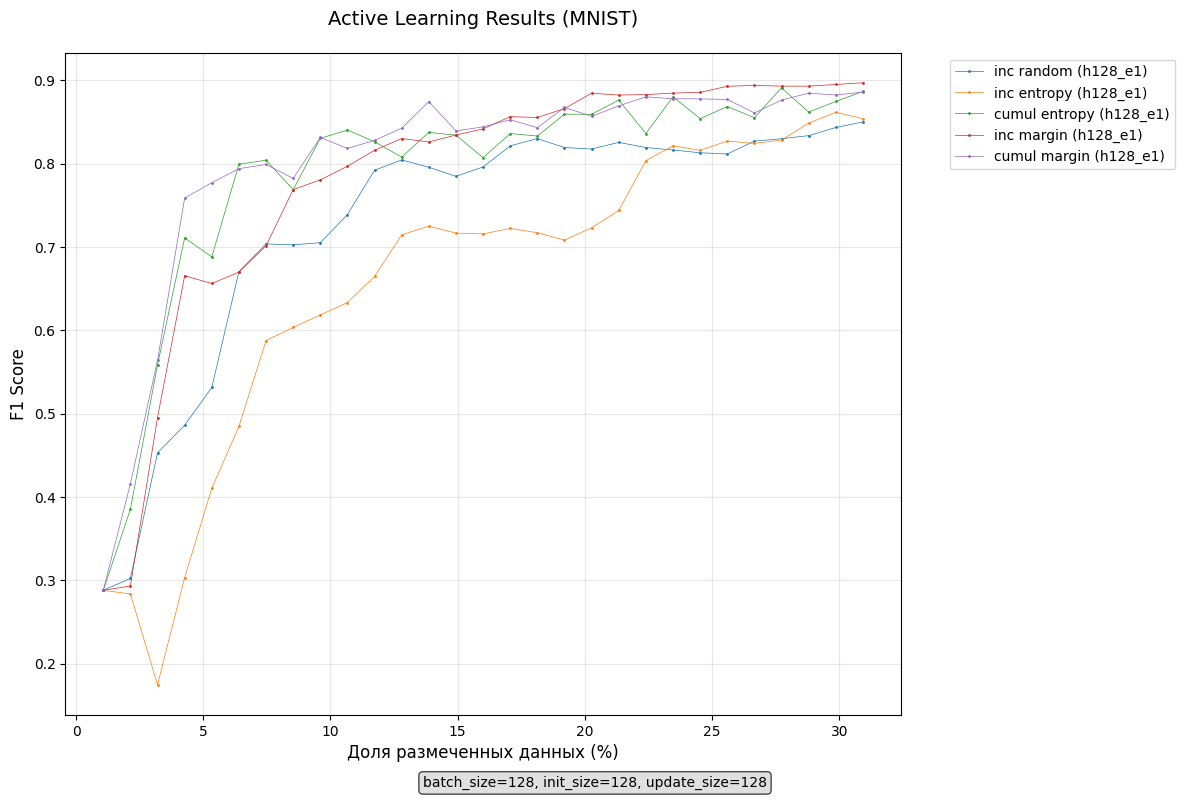

In [6]:
AL1.fit(stop_ratio=0.3)
AL2.fit(stop_ratio=0.3)
AL3.fit(stop_ratio=0.3)
AL4.fit(stop_ratio=0.3)
AL5.fit(stop_ratio=0.3)
al.plot_active_learning_results_many(AL1, AL2, AL3, AL4, AL5, dataset_name="MNIST")

Margin vs. Entropy (Fashion-MNIST)

In [7]:
AL1 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="random", al_type="incremental", update_size=128, batch_size=128, metric="f1")
AL2 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="entropy", al_type="incremental", update_size=128, batch_size=128, metric="f1")
AL3 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="entropy", al_type="cumulative", update_size=128, batch_size=128, metric="f1")
AL4 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="margin", al_type="incremental", update_size=128, batch_size=128, metric="f1")
AL5 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="margin", al_type="cumulative", update_size=128, batch_size=128, metric="f1")

AL TRAINING STARTED (incremental random)
AL TRAINING FINISHED (incremental random)

AL TRAINING STARTED (incremental entropy)
AL TRAINING FINISHED (incremental entropy)

AL TRAINING STARTED (cumulative entropy)
AL TRAINING FINISHED (cumulative entropy)

AL TRAINING STARTED (incremental margin)
AL TRAINING FINISHED (incremental margin)

AL TRAINING STARTED (cumulative margin)
AL TRAINING FINISHED (cumulative margin)



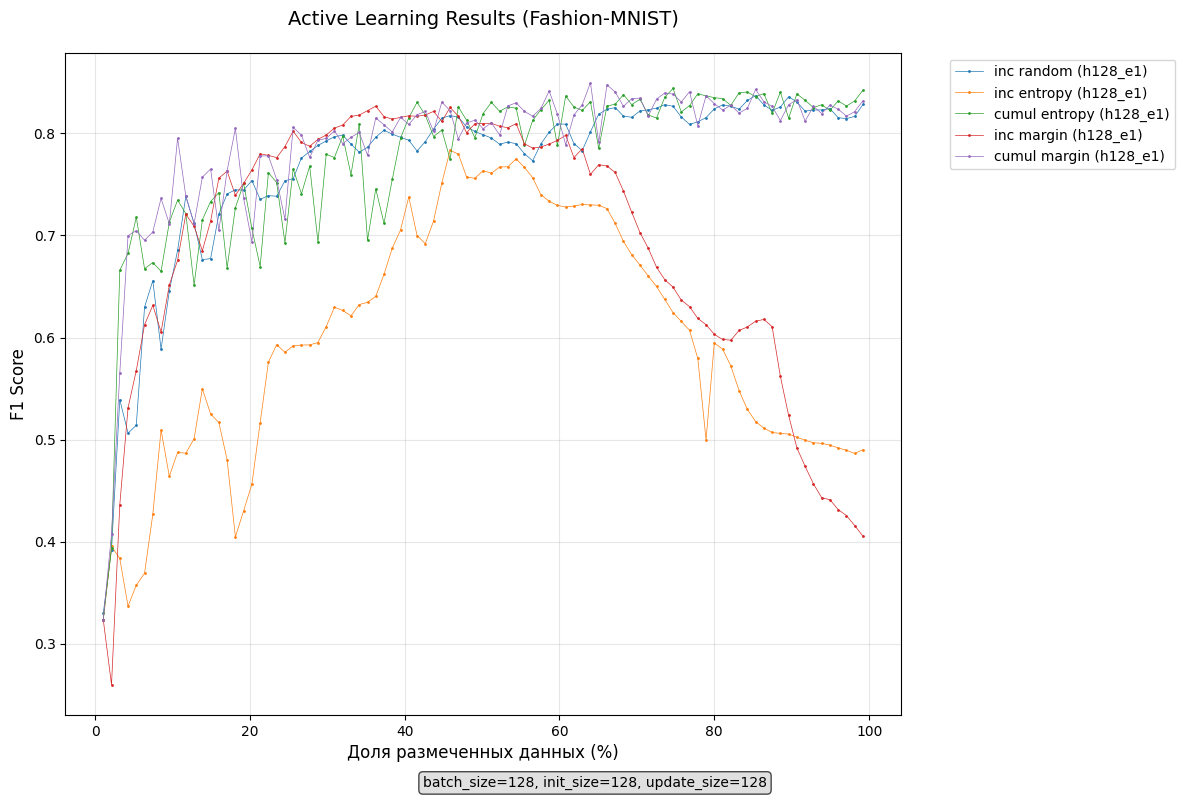

In [8]:
AL1.fit()
AL2.fit()
AL3.fit()
AL4.fit()
AL5.fit()
al.plot_active_learning_results_many(AL1, AL2, AL3, AL4, AL5, dataset_name="Fashion-MNIST")

Margin vs. Confidence (MNIST)

In [9]:
AL1 = al.ActiveLearning(al.ANN(), X_train_mnist, y_train_mnist, X_test_mnist, y_test_mnist,
                    strategy="random", al_type="incremental", update_size=128, batch_size=128, metric="f1")
AL2 = al.ActiveLearning(al.ANN(), X_train_mnist, y_train_mnist, X_test_mnist, y_test_mnist,
                    strategy="confidence", al_type="incremental", update_size=128, batch_size=128, metric="f1")
AL3 = al.ActiveLearning(al.ANN(), X_train_mnist, y_train_mnist, X_test_mnist, y_test_mnist,
                    strategy="confidence", al_type="cumulative", update_size=128, batch_size=128, metric="f1")
AL4 = al.ActiveLearning(al.ANN(), X_train_mnist, y_train_mnist, X_test_mnist, y_test_mnist,
                    strategy="margin", al_type="incremental", update_size=128, batch_size=128, metric="f1")
AL5 = al.ActiveLearning(al.ANN(), X_train_mnist, y_train_mnist, X_test_mnist, y_test_mnist,
                    strategy="margin", al_type="cumulative", update_size=128, batch_size=128, metric="f1")

AL TRAINING STARTED
Training AL: incremental random | Доля: 1.067
Training AL: incremental random | Доля: 2.133
Training AL: incremental random | Доля: 3.200
Training AL: incremental random | Доля: 4.267
Training AL: incremental random | Доля: 5.333
Training AL: incremental random | Доля: 6.400
Training AL: incremental random | Доля: 7.467
Training AL: incremental random | Доля: 8.533
Training AL: incremental random | Доля: 9.600
Training AL: incremental random | Доля: 10.667
Training AL: incremental random | Доля: 11.733
Training AL: incremental random | Доля: 12.800
Training AL: incremental random | Доля: 13.867
Training AL: incremental random | Доля: 14.933
Training AL: incremental random | Доля: 16.000
Training AL: incremental random | Доля: 17.067
Training AL: incremental random | Доля: 18.133
Training AL: incremental random | Доля: 19.200
Training AL: incremental random | Доля: 20.267
Training AL: incremental random | Доля: 21.333
Training AL: incremental random | Доля: 22.400
Tr

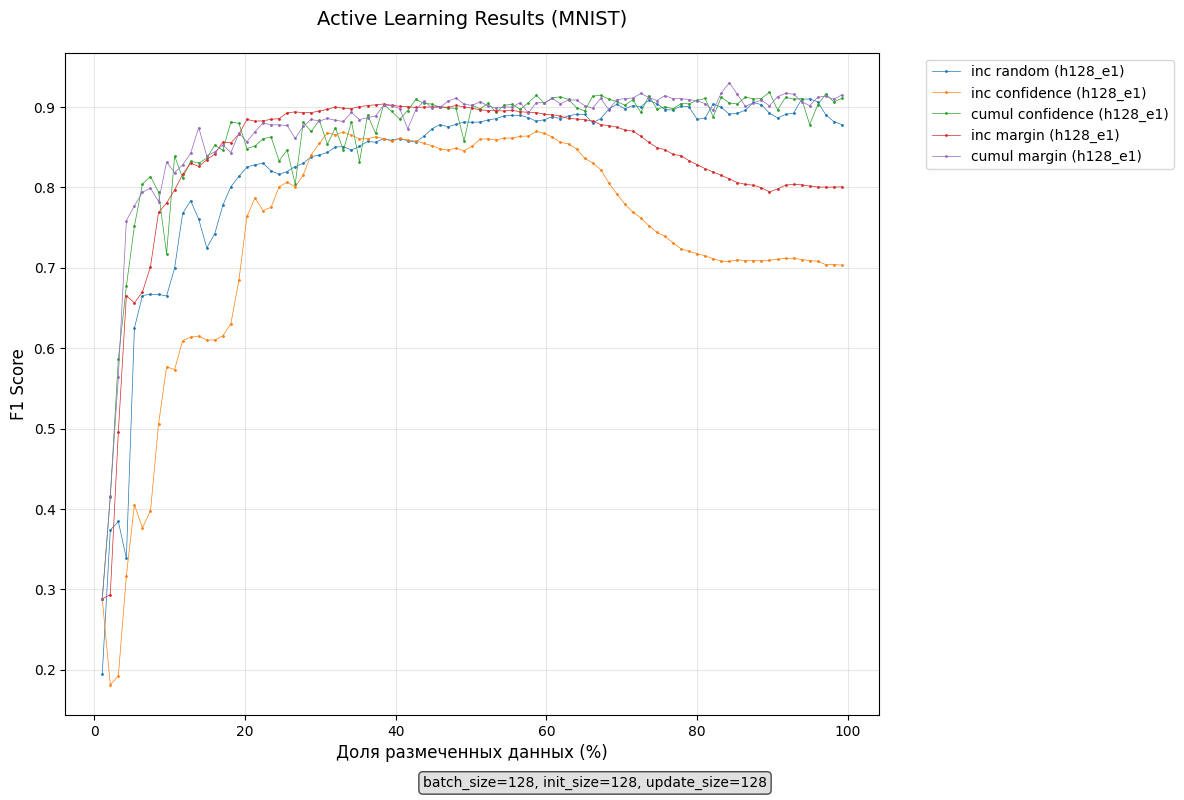

In [10]:
AL1.fit()
AL2.fit()
AL3.fit()
AL4.fit()
AL5.fit()
al.plot_active_learning_results_many(AL1, AL2, AL3, AL4, AL5, dataset_name="MNIST")

Margin vs. Confidence (Fashion-MNIST)

In [11]:
AL1 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="random", al_type="incremental", update_size=128, batch_size=128, metric="f1")
AL2 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="confidence", al_type="incremental", update_size=128, batch_size=128, metric="f1")
AL3 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="confidence", al_type="cumulative", update_size=128, batch_size=128, metric="f1")
AL4 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="margin", al_type="incremental", update_size=128, batch_size=128, metric="f1")
AL5 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="margin", al_type="cumulative", update_size=128, batch_size=128, metric="f1")

AL TRAINING STARTED
Training AL: incremental random | Доля: 1.067
Training AL: incremental random | Доля: 2.133
Training AL: incremental random | Доля: 3.200
Training AL: incremental random | Доля: 4.267
Training AL: incremental random | Доля: 5.333
Training AL: incremental random | Доля: 6.400
Training AL: incremental random | Доля: 7.467
Training AL: incremental random | Доля: 8.533
Training AL: incremental random | Доля: 9.600
Training AL: incremental random | Доля: 10.667
Training AL: incremental random | Доля: 11.733
Training AL: incremental random | Доля: 12.800
Training AL: incremental random | Доля: 13.867
Training AL: incremental random | Доля: 14.933
Training AL: incremental random | Доля: 16.000
Training AL: incremental random | Доля: 17.067
Training AL: incremental random | Доля: 18.133
Training AL: incremental random | Доля: 19.200
Training AL: incremental random | Доля: 20.267
Training AL: incremental random | Доля: 21.333
Training AL: incremental random | Доля: 22.400
Tr

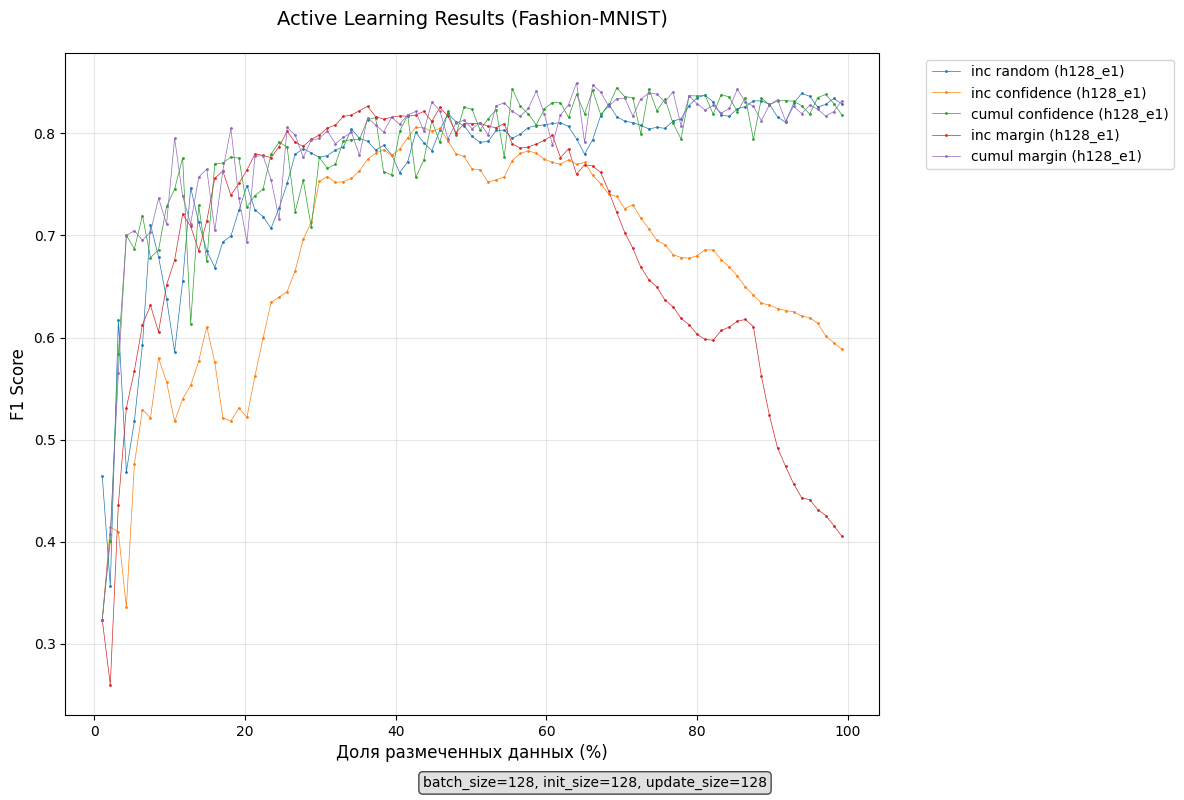

In [12]:
AL1.fit()
AL2.fit()
AL3.fit()
AL4.fit()
AL5.fit()
al.plot_active_learning_results_many(AL1, AL2, AL3, AL4, AL5, dataset_name="Fashion-MNIST")

Varying skip_size (MNIST)

In [15]:
AL1 = al.ActiveLearning(al.ANN(), X_train_mnist, y_train_mnist, X_test_mnist, y_test_mnist,
                    strategy="margin", al_type="incremental", update_size=128, batch_size=128, metric="f1", skip=True, skip_size=4)
AL2 = al.ActiveLearning(al.ANN(), X_train_mnist, y_train_mnist, X_test_mnist, y_test_mnist,
                    strategy="margin", al_type="incremental", update_size=128, batch_size=128, metric="f1", skip=True, skip_size=8)
AL3 = al.ActiveLearning(al.ANN(), X_train_mnist, y_train_mnist, X_test_mnist, y_test_mnist,
                    strategy="margin", al_type="incremental", update_size=128, batch_size=128, metric="f1", skip=True, skip_size=16)
AL4 = al.ActiveLearning(al.ANN(), X_train_mnist, y_train_mnist, X_test_mnist, y_test_mnist,
                    strategy="margin", al_type="incremental", update_size=128, batch_size=128, metric="f1", skip=True, skip_size=24)
AL5 = al.ActiveLearning(al.ANN(), X_train_mnist, y_train_mnist, X_test_mnist, y_test_mnist,
                    strategy="margin", al_type="incremental", update_size=128, batch_size=128, metric="f1", skip=True, skip_size=32)

AL TRAINING STARTED
Training AL: incremental margin | Доля: 1.067
Training AL: incremental margin | Доля: 2.100
Training AL: incremental margin | Доля: 3.133
Training AL: incremental margin | Доля: 4.167
Training AL: incremental margin | Доля: 5.200
Training AL: incremental margin | Доля: 6.233
Training AL: incremental margin | Доля: 7.267
Training AL: incremental margin | Доля: 8.300
Training AL: incremental margin | Доля: 9.333
Training AL: incremental margin | Доля: 10.367
Training AL: incremental margin | Доля: 11.400
Training AL: incremental margin | Доля: 12.433
Training AL: incremental margin | Доля: 13.467
Training AL: incremental margin | Доля: 14.500
Training AL: incremental margin | Доля: 15.533
Training AL: incremental margin | Доля: 16.567
Training AL: incremental margin | Доля: 17.600
Training AL: incremental margin | Доля: 18.633
Training AL: incremental margin | Доля: 19.667
Training AL: incremental margin | Доля: 20.700
Training AL: incremental margin | Доля: 21.733
Tr

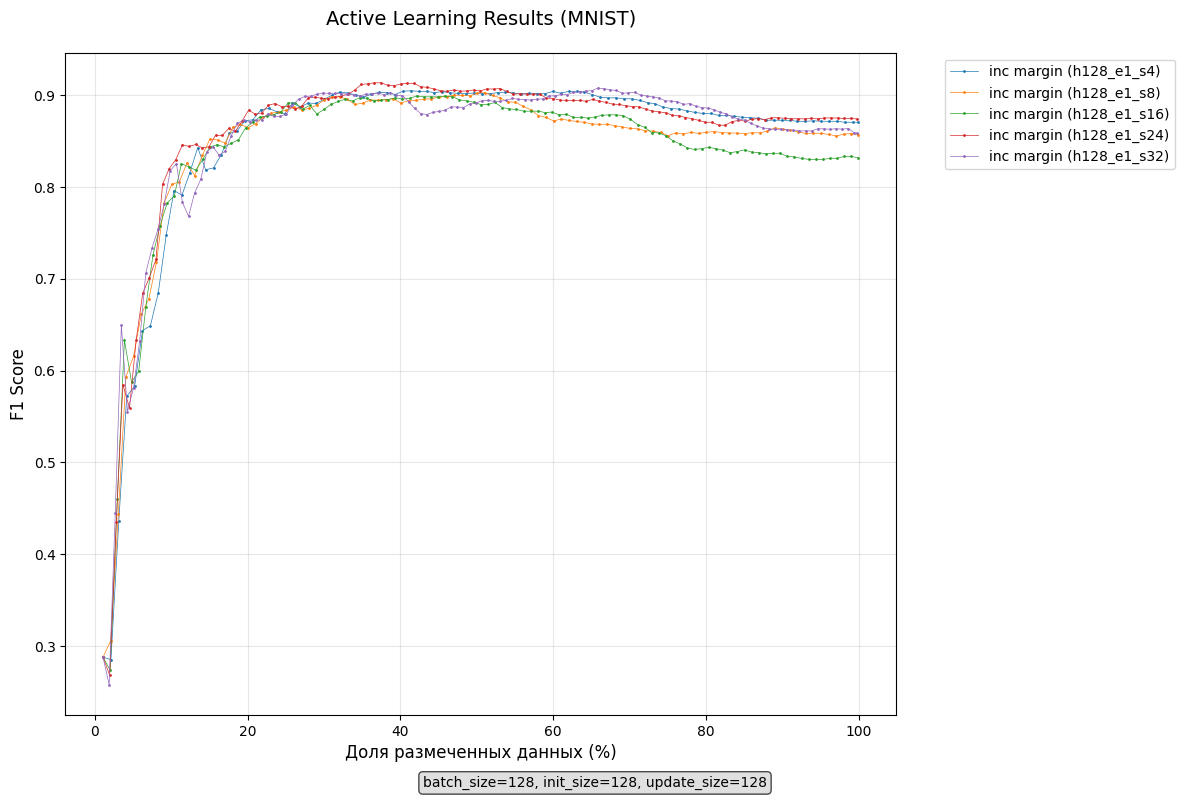

In [16]:
AL1.fit()
AL2.fit()
AL3.fit()
AL4.fit()
AL5.fit()
al.plot_active_learning_results_many(AL1, AL2, AL3, AL4, AL5, dataset_name="MNIST")

Varying skip_size (Fashion-MNIST)

In [17]:
AL1 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="margin", al_type="incremental", update_size=128, batch_size=128, metric="f1", skip=True, skip_size=4)
AL2 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="margin", al_type="incremental", update_size=128, batch_size=128, metric="f1", skip=True, skip_size=8)
AL3 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="margin", al_type="incremental", update_size=128, batch_size=128, metric="f1", skip=True, skip_size=16)
AL4 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="margin", al_type="incremental", update_size=128, batch_size=128, metric="f1", skip=True, skip_size=24)
AL5 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="margin", al_type="incremental", update_size=128, batch_size=128, metric="f1", skip=True, skip_size=32)

AL TRAINING STARTED
Training AL: incremental margin | Доля: 1.067
Training AL: incremental margin | Доля: 2.100
Training AL: incremental margin | Доля: 3.133
Training AL: incremental margin | Доля: 4.167
Training AL: incremental margin | Доля: 5.200
Training AL: incremental margin | Доля: 6.233
Training AL: incremental margin | Доля: 7.267
Training AL: incremental margin | Доля: 8.300
Training AL: incremental margin | Доля: 9.333
Training AL: incremental margin | Доля: 10.367
Training AL: incremental margin | Доля: 11.400
Training AL: incremental margin | Доля: 12.433
Training AL: incremental margin | Доля: 13.467
Training AL: incremental margin | Доля: 14.500
Training AL: incremental margin | Доля: 15.533
Training AL: incremental margin | Доля: 16.567
Training AL: incremental margin | Доля: 17.600
Training AL: incremental margin | Доля: 18.633
Training AL: incremental margin | Доля: 19.667
Training AL: incremental margin | Доля: 20.700
Training AL: incremental margin | Доля: 21.733
Tr

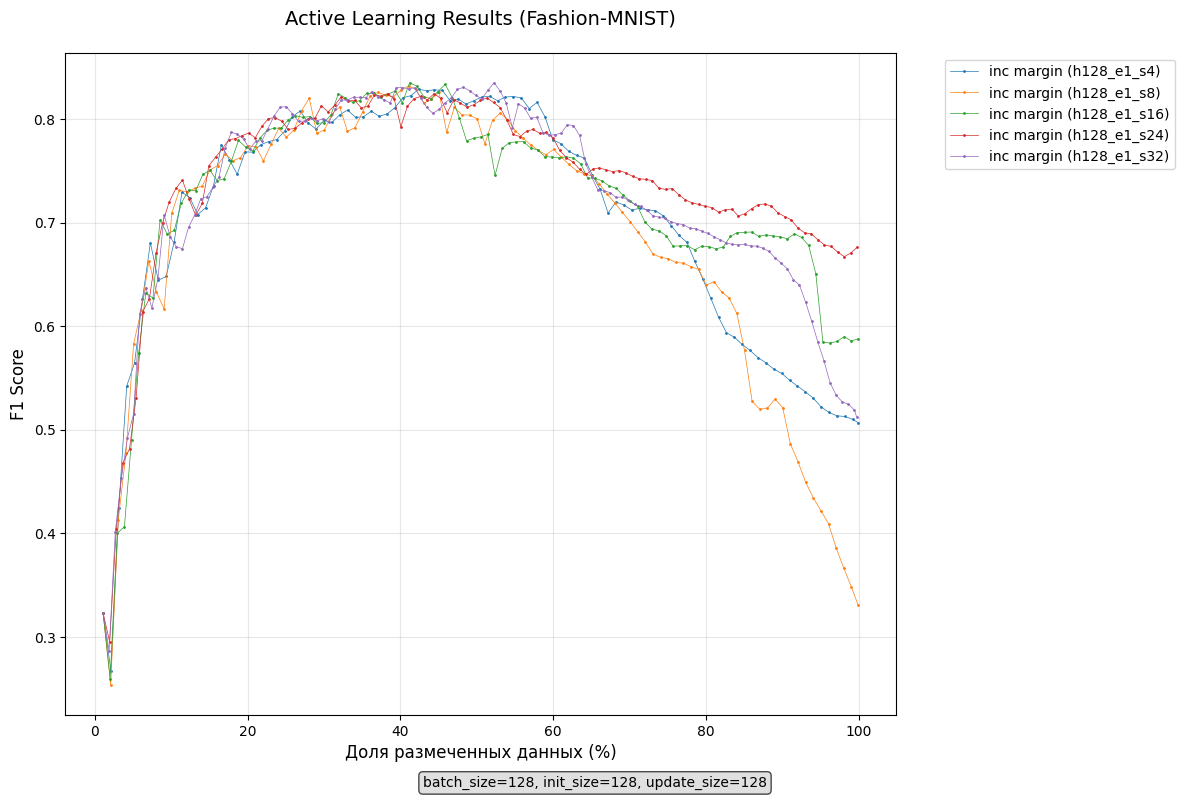

In [18]:
AL1.fit()
AL2.fit()
AL3.fit()
AL4.fit()
AL5.fit()
al.plot_active_learning_results_many(AL1, AL2, AL3, AL4, AL5, dataset_name="Fashion-MNIST")

Varying epochs on margin (MNIST)

In [19]:
AL1 = al.ActiveLearning(al.ANN(), X_train_mnist, y_train_mnist, X_test_mnist, y_test_mnist,
                    strategy="margin", al_type="cumulative", update_size=128, batch_size=128, metric="f1", epochs=1)
AL2 = al.ActiveLearning(al.ANN(), X_train_mnist, y_train_mnist, X_test_mnist, y_test_mnist,
                    strategy="margin", al_type="incremental", update_size=128, batch_size=128, metric="f1", epochs=1)
AL3 = al.ActiveLearning(al.ANN(), X_train_mnist, y_train_mnist, X_test_mnist, y_test_mnist,
                    strategy="margin", al_type="cumulative", update_size=128, batch_size=128, metric="f1", epochs=3)
AL4 = al.ActiveLearning(al.ANN(), X_train_mnist, y_train_mnist, X_test_mnist, y_test_mnist,
                    strategy="margin", al_type="incremental", update_size=128, batch_size=128, metric="f1", epochs=3)
AL5 = al.ActiveLearning(al.ANN(), X_train_mnist, y_train_mnist, X_test_mnist, y_test_mnist,
                    strategy="margin", al_type="cumulative", update_size=128, batch_size=128, metric="f1", epochs=5)
AL6 = al.ActiveLearning(al.ANN(), X_train_mnist, y_train_mnist, X_test_mnist, y_test_mnist,
                    strategy="margin", al_type="incremental", update_size=128, batch_size=128, metric="f1", epochs=5)
AL7 = al.ActiveLearning(al.ANN(), X_train_mnist, y_train_mnist, X_test_mnist, y_test_mnist,
                    strategy="margin", al_type="cumulative", update_size=128, batch_size=128, metric="f1", epochs=10)
AL8 = al.ActiveLearning(al.ANN(), X_train_mnist, y_train_mnist, X_test_mnist, y_test_mnist,
                    strategy="margin", al_type="incremental", update_size=128, batch_size=128, metric="f1", epochs=10)

AL TRAINING STARTED
Training AL: cumulative margin | Доля: 1.067
Training AL: cumulative margin | Доля: 2.133
Training AL: cumulative margin | Доля: 3.200
Training AL: cumulative margin | Доля: 4.267
Training AL: cumulative margin | Доля: 5.333
Training AL: cumulative margin | Доля: 6.400
Training AL: cumulative margin | Доля: 7.467
Training AL: cumulative margin | Доля: 8.533
Training AL: cumulative margin | Доля: 9.600
Training AL: cumulative margin | Доля: 10.667
Training AL: cumulative margin | Доля: 11.733
Training AL: cumulative margin | Доля: 12.800
Training AL: cumulative margin | Доля: 13.867
Training AL: cumulative margin | Доля: 14.933
Training AL: cumulative margin | Доля: 16.000
Training AL: cumulative margin | Доля: 17.067
Training AL: cumulative margin | Доля: 18.133
Training AL: cumulative margin | Доля: 19.200
Training AL: cumulative margin | Доля: 20.267
Training AL: cumulative margin | Доля: 21.333
Training AL: cumulative margin | Доля: 22.400
Training AL: cumulative

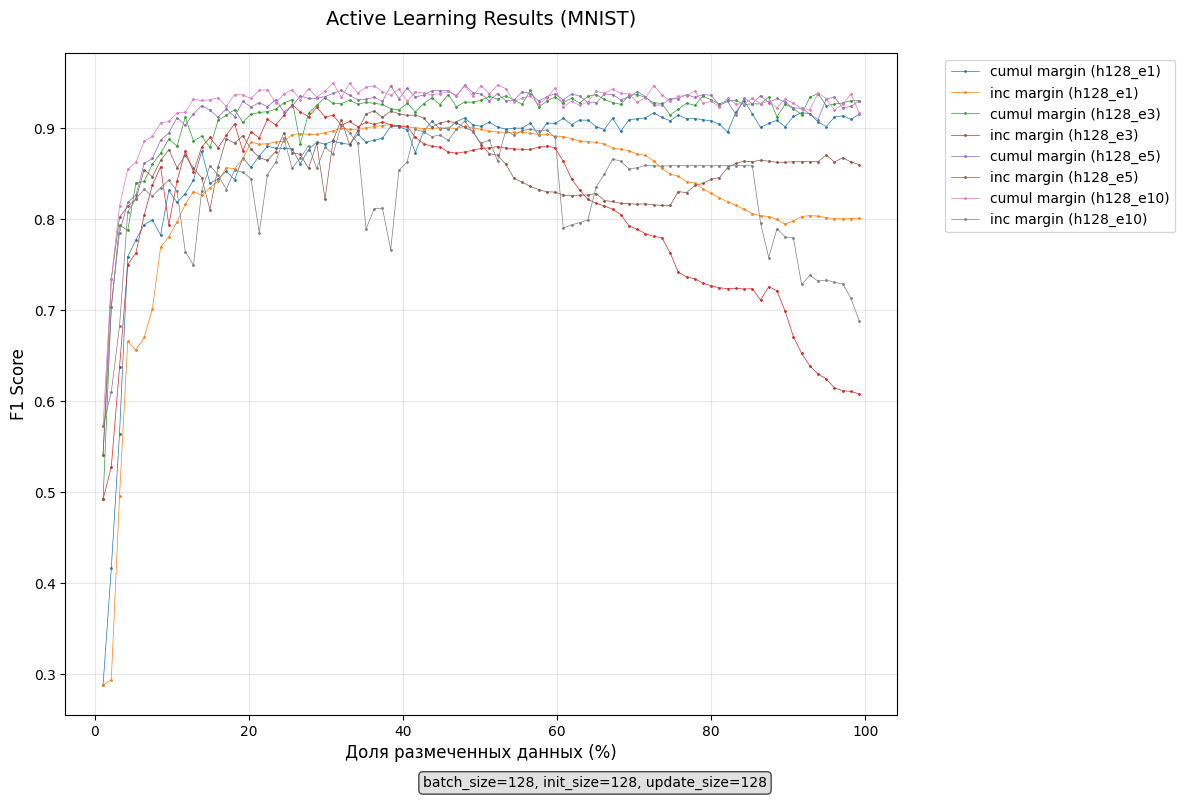

In [20]:
AL1.fit()
AL2.fit()
AL3.fit()
AL4.fit()
AL5.fit()
AL6.fit()
AL7.fit()
AL8.fit()
al.plot_active_learning_results_many(AL1, AL2, AL3, AL4, AL5, AL6, AL7, AL8, dataset_name="MNIST")

Varying epochs on random (MNIST)

In [38]:
AL1 = al.ActiveLearning(al.ANN(), X_train_mnist, y_train_mnist, X_test_mnist, y_test_mnist,
                    strategy="random", al_type="cumulative", update_size=128, batch_size=128, metric="f1", epochs=1)
AL2 = al.ActiveLearning(al.ANN(), X_train_mnist, y_train_mnist, X_test_mnist, y_test_mnist,
                    strategy="random", al_type="incremental", update_size=128, batch_size=128, metric="f1", epochs=1)
AL3 = al.ActiveLearning(al.ANN(), X_train_mnist, y_train_mnist, X_test_mnist, y_test_mnist,
                    strategy="random", al_type="cumulative", update_size=128, batch_size=128, metric="f1", epochs=3)
AL4 = al.ActiveLearning(al.ANN(), X_train_mnist, y_train_mnist, X_test_mnist, y_test_mnist,
                    strategy="random", al_type="incremental", update_size=128, batch_size=128, metric="f1", epochs=3)
AL5 = al.ActiveLearning(al.ANN(), X_train_mnist, y_train_mnist, X_test_mnist, y_test_mnist,
                    strategy="random", al_type="cumulative", update_size=128, batch_size=128, metric="f1", epochs=5)
AL6 = al.ActiveLearning(al.ANN(), X_train_mnist, y_train_mnist, X_test_mnist, y_test_mnist,
                    strategy="random", al_type="incremental", update_size=128, batch_size=128, metric="f1", epochs=5)
AL7 = al.ActiveLearning(al.ANN(), X_train_mnist, y_train_mnist, X_test_mnist, y_test_mnist,
                    strategy="random", al_type="cumulative", update_size=128, batch_size=128, metric="f1", epochs=10)
AL8 = al.ActiveLearning(al.ANN(), X_train_mnist, y_train_mnist, X_test_mnist, y_test_mnist,
                    strategy="random", al_type="incremental", update_size=128, batch_size=128, metric="f1", epochs=10)

AL TRAINING STARTED
Training AL: cumulative random | Доля: 1.067
Training AL: cumulative random | Доля: 2.133
Training AL: cumulative random | Доля: 3.200
Training AL: cumulative random | Доля: 4.267
Training AL: cumulative random | Доля: 5.333
Training AL: cumulative random | Доля: 6.400
Training AL: cumulative random | Доля: 7.467
Training AL: cumulative random | Доля: 8.533
Training AL: cumulative random | Доля: 9.600
Training AL: cumulative random | Доля: 10.667
Training AL: cumulative random | Доля: 11.733
Training AL: cumulative random | Доля: 12.800
Training AL: cumulative random | Доля: 13.867
Training AL: cumulative random | Доля: 14.933
Training AL: cumulative random | Доля: 16.000
Training AL: cumulative random | Доля: 17.067
Training AL: cumulative random | Доля: 18.133
Training AL: cumulative random | Доля: 19.200
Training AL: cumulative random | Доля: 20.267
Training AL: cumulative random | Доля: 21.333
Training AL: cumulative random | Доля: 22.400
Training AL: cumulative

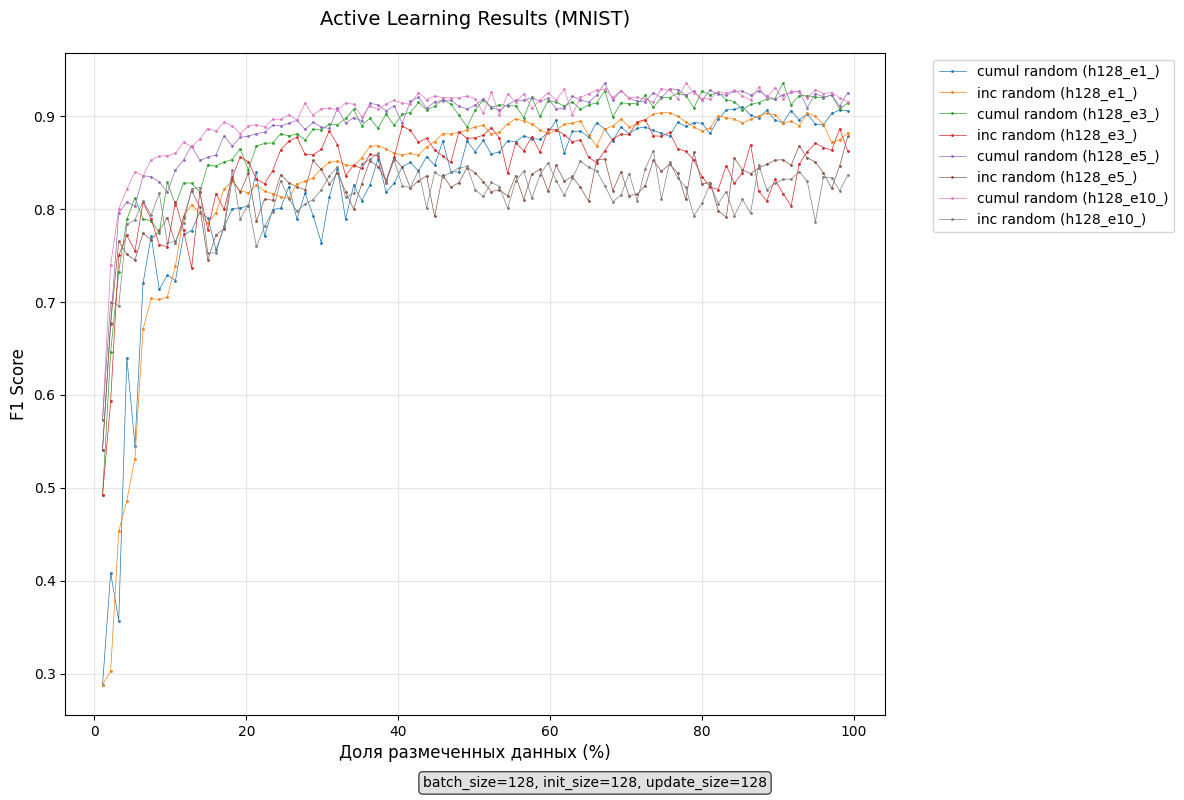

In [39]:
AL1.fit()
AL2.fit()
AL3.fit()
AL4.fit()
AL5.fit()
AL6.fit()
AL7.fit()
AL8.fit()
al.plot_active_learning_results_many(AL1, AL2, AL3, AL4, AL5, AL6, AL7, AL8, dataset_name="MNIST")

Varying epochs on inc margin (MNIST)

In [40]:
AL1 = al.ActiveLearning(al.ANN(), X_train_mnist, y_train_mnist, X_test_mnist, y_test_mnist,
                    strategy="margin", al_type="incremental", update_size=128, batch_size=128, metric="f1", epochs=1)
AL2 = al.ActiveLearning(al.ANN(), X_train_mnist, y_train_mnist, X_test_mnist, y_test_mnist,
                    strategy="margin", al_type="incremental", update_size=128, batch_size=128, metric="f1", epochs=3)
AL3 = al.ActiveLearning(al.ANN(), X_train_mnist, y_train_mnist, X_test_mnist, y_test_mnist,
                    strategy="margin", al_type="incremental", update_size=128, batch_size=128, metric="f1", epochs=5)
AL4 = al.ActiveLearning(al.ANN(), X_train_mnist, y_train_mnist, X_test_mnist, y_test_mnist,
                    strategy="margin", al_type="incremental", update_size=128, batch_size=128, metric="f1", epochs=10)
AL5 = al.ActiveLearning(al.ANN(), X_train_mnist, y_train_mnist, X_test_mnist, y_test_mnist,
                    strategy="margin", al_type="incremental", update_size=128, batch_size=128, metric="f1", epochs=15)
AL6 = al.ActiveLearning(al.ANN(), X_train_mnist, y_train_mnist, X_test_mnist, y_test_mnist,
                    strategy="margin", al_type="incremental", update_size=128, batch_size=128, metric="f1", epochs=20)
AL7 = al.ActiveLearning(al.ANN(), X_train_mnist, y_train_mnist, X_test_mnist, y_test_mnist,
                    strategy="margin", al_type="incremental", update_size=128, batch_size=128, metric="f1", epochs=30)
AL8 = al.ActiveLearning(al.ANN(), X_train_mnist, y_train_mnist, X_test_mnist, y_test_mnist,
                    strategy="margin", al_type="incremental", update_size=128, batch_size=128, metric="f1", epochs=50)

AL TRAINING STARTED
Training AL: incremental margin | Доля: 1.067
Training AL: incremental margin | Доля: 2.133
Training AL: incremental margin | Доля: 3.200
Training AL: incremental margin | Доля: 4.267
Training AL: incremental margin | Доля: 5.333
Training AL: incremental margin | Доля: 6.400
Training AL: incremental margin | Доля: 7.467
Training AL: incremental margin | Доля: 8.533
Training AL: incremental margin | Доля: 9.600
Training AL: incremental margin | Доля: 10.667
Training AL: incremental margin | Доля: 11.733
Training AL: incremental margin | Доля: 12.800
Training AL: incremental margin | Доля: 13.867
Training AL: incremental margin | Доля: 14.933
Training AL: incremental margin | Доля: 16.000
Training AL: incremental margin | Доля: 17.067
Training AL: incremental margin | Доля: 18.133
Training AL: incremental margin | Доля: 19.200
Training AL: incremental margin | Доля: 20.267
Training AL: incremental margin | Доля: 21.333
Training AL: incremental margin | Доля: 22.400
Tr

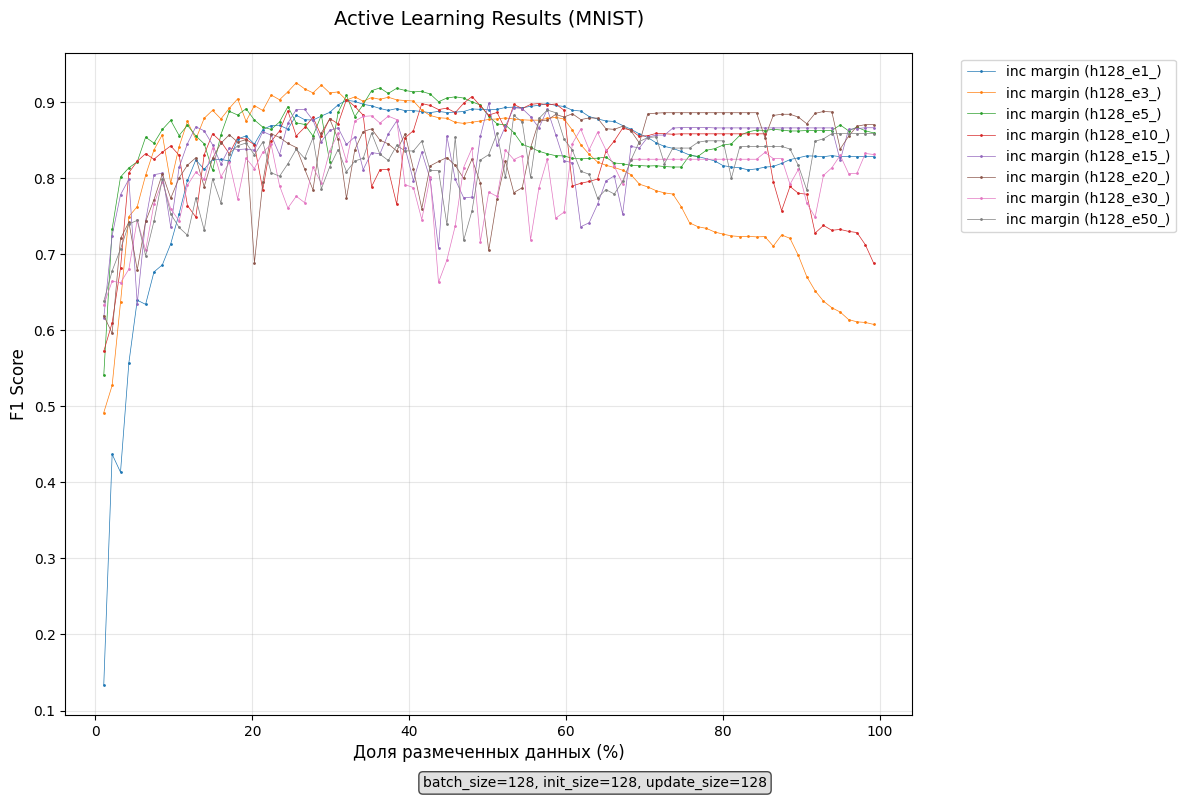

In [41]:
AL1.fit()
AL2.fit()
AL3.fit()
AL4.fit()
AL5.fit()
AL6.fit()
AL7.fit()
AL8.fit()
al.plot_active_learning_results_many(AL1, AL2, AL3, AL4, AL5, AL6, AL7, AL8, dataset_name="MNIST")